In [1]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import prettytable as pt
import matplotlib.pyplot as plt
from scipy.stats import binom
import scipy.stats as st

In [3]:
class frequentist:

    def __init__(self, θ, n, I):

        '''
        initialization
        -----------------
        parameters:
        θ : probability that one toss of a coin will be a head with Y = 1
        n : number of independent flips in each independent sequence of draws
        I : number of independent sequence of draws

        '''

        self.θ, self.n, self.I = θ, n, I

    def binomial(self, k):

        '''compute the theoretical probability for specific input k'''

        θ, n = self.θ, self.n
        self.k = k
        self.P = binom.pmf(k, n, θ)

    def draw(self):

        '''draw n independent flips for I independent sequences'''

        θ, n, I = self.θ, self.n, self.I
        sample = np.random.rand(I, n)
        Y = (sample <= θ) * 1
        self.Y = Y

    def compute_fk(self, kk):

        '''compute f_{k}^I for specific input k'''

        Y, I = self.Y, self.I
        K = np.sum(Y, 1)
        f_kI = np.sum(K == kk) / I
        self.f_kI = f_kI
        self.kk = kk

    def compare(self):

        '''compute and print the comparison'''

        n = self.n
        comp = pt.PrettyTable()
        comp.field_names = ['k', 'Theoretical', 'Frequentist']
        self.draw()
        for i in range(n):
            self.binomial(i+1)
            self.compute_fk(i+1)
            comp.add_row([i+1, self.P, self.f_kI])
        print(comp)

In [4]:
θ, n, k, I = 0.7, 20, 10, 1_000_000

freq = frequentist(θ, n, I)

freq.compare()

+----+------------------------+-------------+
| k  |      Theoretical       | Frequentist |
+----+------------------------+-------------+
| 1  | 1.6271660538000039e-09 |     0.0     |
| 2  | 3.6068847525900024e-08 |     0.0     |
| 3  | 5.049638653626012e-07  |    1e-06    |
| 4  | 5.0075583315124565e-06 |    7e-06    |
| 5  | 3.738976887529304e-05  |   3.9e-05   |
| 6  | 0.0002181069851058756  |   0.000223  |
| 7  | 0.0010178325971607542  |   0.001021  |
| 8  | 0.0038592819309011856  |   0.003909  |
| 9  |  0.012006654896137014  |   0.012061  |
| 10 |  0.03081708090008503   |   0.030648  |
| 11 |  0.06536956554563503   |   0.065145  |
| 12 |  0.11439673970486113   |   0.114252  |
| 13 |  0.16426198521723653   |   0.164361  |
| 14 |  0.19163898275344252   |   0.191078  |
| 15 |  0.17886305056987975   |   0.179336  |
| 16 |  0.13042097437387049   |   0.130042  |
| 17 |  0.07160367220526213   |   0.072098  |
| 18 |  0.027845872524268653  |   0.027966  |
| 19 |  0.006839337111223874  |   

In [5]:
θ_low, θ_high, npt = 0.01, 0.99, 50
thetas = np.linspace(θ_low, θ_high, npt)
P = []
f_kI = []
for i in range(npt):
    freq = frequentist(thetas[i], n, I)
    freq.binomial(k)
    freq.draw()
    freq.compute_fk(k)
    P.append(freq.P)
    f_kI.append(freq.f_kI)

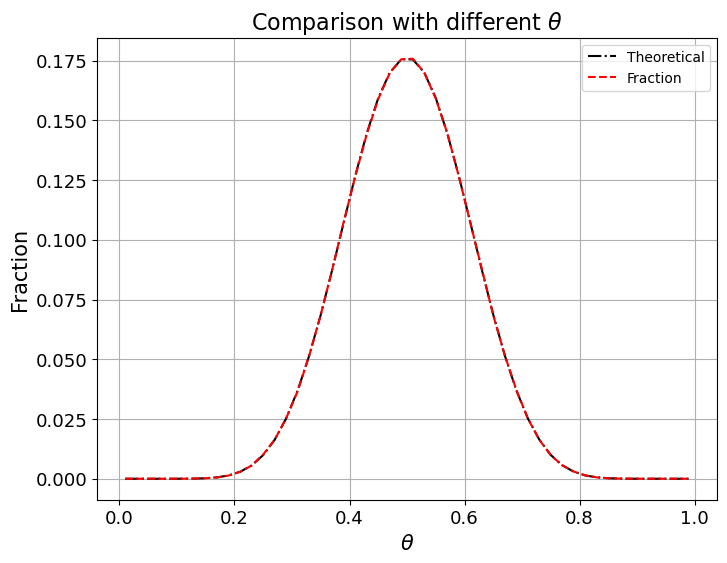

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()
ax.plot(thetas, P, 'k-.', label='Theoretical')
ax.plot(thetas, f_kI, 'r--', label='Fraction')
plt.title(r'Comparison with different $\theta$', fontsize=16)
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel('Fraction', fontsize=15)
plt.tick_params(labelsize=13)
plt.legend()
plt.show()

In [7]:
n_low, n_high, nn = 1, 100, 50
ns = np.linspace(n_low, n_high, nn, dtype='int')
P = []
f_kI = []
for i in range(nn):
    freq = frequentist(θ, ns[i], I)
    freq.binomial(k)
    freq.draw()
    freq.compute_fk(k)
    P.append(freq.P)
    f_kI.append(freq.f_kI)

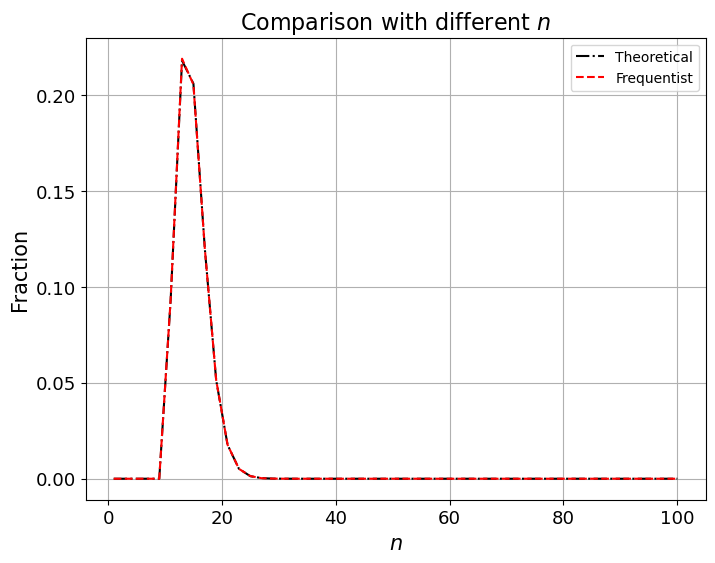

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()
ax.plot(ns, P, 'k-.', label='Theoretical')
ax.plot(ns, f_kI, 'r--', label='Frequentist')
plt.title(r'Comparison with different $n$', fontsize=16)
plt.xlabel(r'$n$', fontsize=15)
plt.ylabel('Fraction', fontsize=15)
plt.tick_params(labelsize=13)
plt.legend()
plt.show()

In [9]:
I_log_low, I_log_high, nI = 2, 6, 200
log_Is = np.linspace(I_log_low, I_log_high, nI)
Is = np.power(10, log_Is).astype(int)
P = []
f_kI = []
for i in range(nI):
    freq = frequentist(θ, n, Is[i])
    freq.binomial(k)
    freq.draw()
    freq.compute_fk(k)
    P.append(freq.P)
    f_kI.append(freq.f_kI)

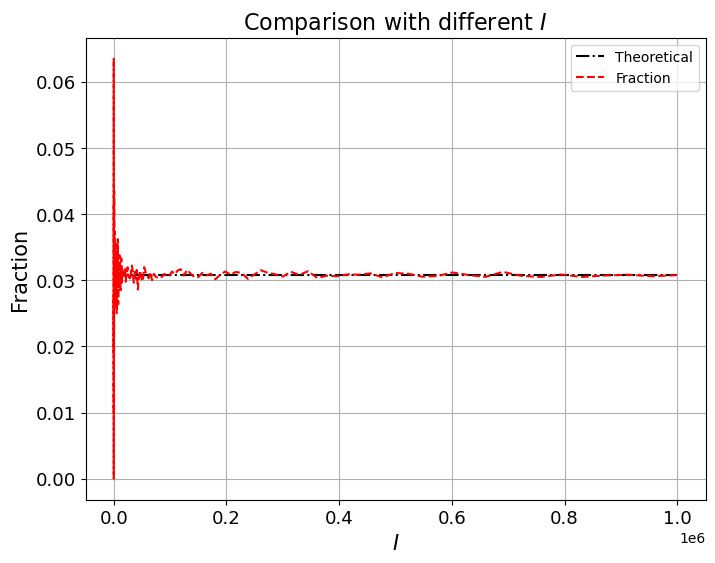

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()
ax.plot(Is, P, 'k-.', label='Theoretical')
ax.plot(Is, f_kI, 'r--', label='Fraction')
plt.title(r'Comparison with different $I$', fontsize=16)
plt.xlabel(r'$I$', fontsize=15)
plt.ylabel('Fraction', fontsize=15)
plt.tick_params(labelsize=13)
plt.legend()
plt.show()

In [11]:
class Bayesian:

    def __init__(self, θ=0.4, n=1_000_000, α=0.5, β=0.5):
        """
        Parameters:
        ----------
        θ : float, ranging from [0,1].
           probability that one toss of a coin will be a head with Y = 1

        n : int.
           number of independent flips in an independent sequence of draws

        α&β : int or float.
             parameters of the prior distribution on θ

        """
        self.θ, self.n, self.α, self.β = θ, n, α, β
        self.prior = st.beta(α, β)

    def draw(self):
        """
        simulate a single sequence of draws of length n, given probability θ

        """
        array = np.random.rand(self.n)
        self.draws = (array < self.θ).astype(int)

    def form_single_posterior(self, step_num):
        """
        form a posterior distribution after observing the first step_num elements of the draws

        Parameters
        ----------
        step_num: int.
               number of steps observed to form a posterior distribution

        Returns
        ------
        the posterior distribution for sake of plotting in the subsequent steps

        """
        heads_num = self.draws[:step_num].sum()
        tails_num = step_num - heads_num

        return st.beta(self.α+heads_num, self.β+tails_num)

    def form_posterior_series(self,num_obs_list):
        """
        form a series of posterior distributions that form after observing different number of draws.

        Parameters
        ----------
        num_obs_list: a list of int.
               a list of the number of observations used to form a series of posterior distributions.

        """
        self.posterior_list = []
        for num in num_obs_list:
            self.posterior_list.append(self.form_single_posterior(num))

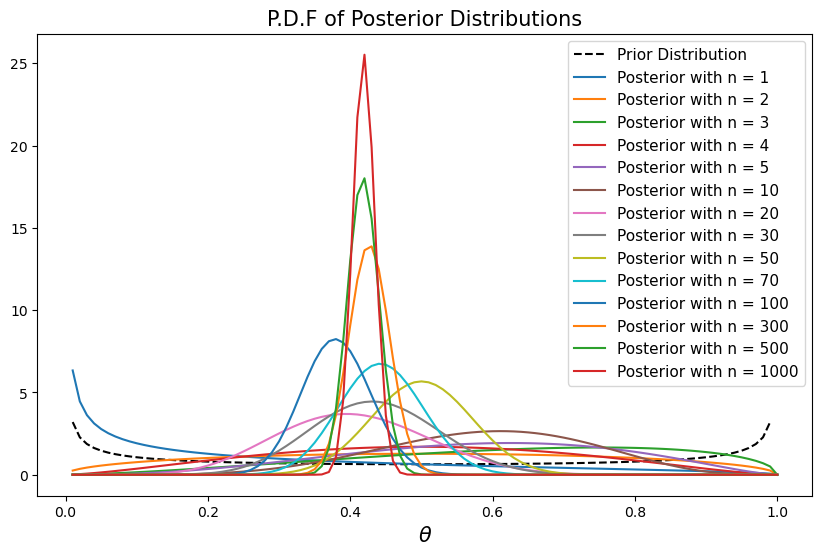

In [12]:
Bay_stat = Bayesian()
Bay_stat.draw()

num_list = [1, 2, 3, 4, 5, 10, 20, 30, 50, 70, 100, 300, 500, 1000, # this line for finite n
            5000, 10_000, 50_000, 100_000, 200_000, 300_000]  # this line for approximately infinite n

Bay_stat.form_posterior_series(num_list)

θ_values = np.linspace(0.01, 1, 100)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(θ_values, Bay_stat.prior.pdf(θ_values), label='Prior Distribution', color='k', linestyle='--')

for ii, num in enumerate(num_list[:14]):
    ax.plot(θ_values, Bay_stat.posterior_list[ii].pdf(θ_values), label='Posterior with n = %d' % num)

ax.set_title('P.D.F of Posterior Distributions', fontsize=15)
ax.set_xlabel(r"$\theta$", fontsize=15)

ax.legend(fontsize=11)
plt.show()

In [13]:
upper_bound = [ii.ppf(0.05) for ii in Bay_stat.posterior_list[:14]]
lower_bound = [ii.ppf(0.95) for ii in Bay_stat.posterior_list[:14]]

interval_df = pd.DataFrame()
interval_df['upper'] = upper_bound
interval_df['lower'] = lower_bound
interval_df.index = num_list[:14]
interval_df = interval_df.T
interval_df

,1,2,3,4,5,10,20,30,50,70,100,300,500,1000
upper,0.001543,0.097308,0.235534,0.16528,0.260634,0.347322,0.237639,0.293487,0.385807,0.348182,0.303401,0.380360,0.382134,0.393532
lower,0.771480,0.902692,0.937587,0.83472,0.872224,0.814884,0.582446,0.582293,0.614193,0.540960,0.461664,0.474013,0.454566,0.444813


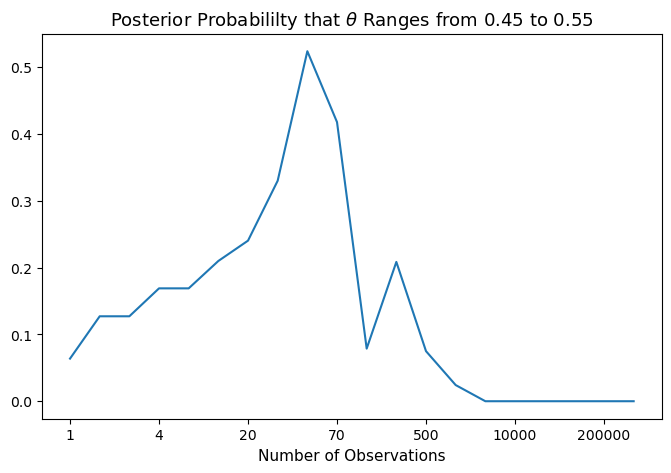

In [14]:
left_value, right_value = 0.45, 0.55

posterior_prob_list=[ii.cdf(right_value)-ii.cdf(left_value) for ii in Bay_stat.posterior_list]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(posterior_prob_list)
ax.set_title('Posterior Probabililty that '+ r"$\theta$" +' Ranges from %.2f to %.2f'%(left_value, right_value),
             fontsize=13)
ax.set_xticks(np.arange(0, len(posterior_prob_list), 3))
ax.set_xticklabels(num_list[::3])
ax.set_xlabel('Number of Observations', fontsize=11)

plt.show()

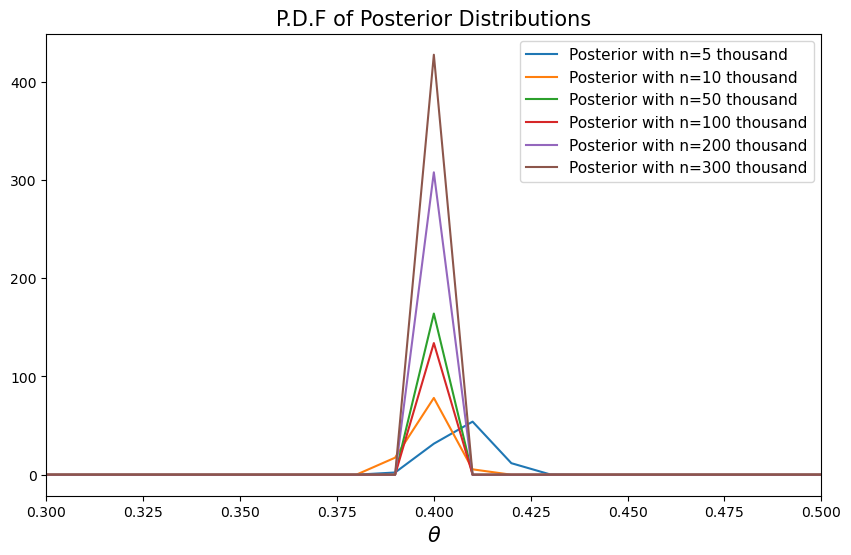

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

for ii, num in enumerate(num_list[14:]):
    ii += 14
    ax.plot(θ_values, Bay_stat.posterior_list[ii].pdf(θ_values),
            label='Posterior with n=%d thousand' % (num/1000))

ax.set_title('P.D.F of Posterior Distributions', fontsize=15)
ax.set_xlabel(r"$\theta$", fontsize=15)
ax.set_xlim(0.3, 0.5)

ax.legend(fontsize=11)
plt.show()

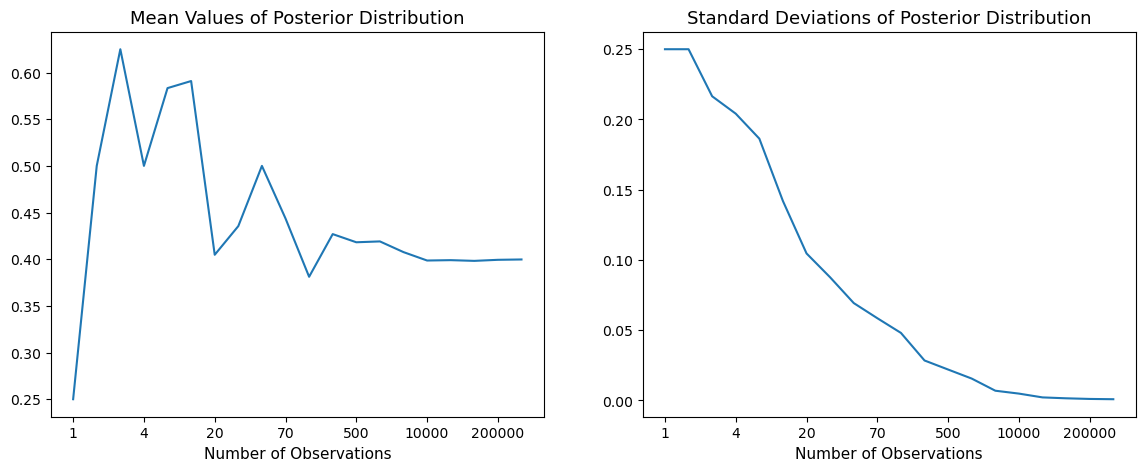

In [16]:
mean_list = [ii.mean() for ii in Bay_stat.posterior_list]
std_list = [ii.std() for ii in Bay_stat.posterior_list]

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(mean_list)
ax[0].set_title('Mean Values of Posterior Distribution', fontsize=13)
ax[0].set_xticks(np.arange(0, len(mean_list), 3))
ax[0].set_xticklabels(num_list[::3])
ax[0].set_xlabel('Number of Observations', fontsize=11)

ax[1].plot(std_list)
ax[1].set_title('Standard Deviations of Posterior Distribution', fontsize=13)
ax[1].set_xticks(np.arange(0, len(std_list), 3))
ax[1].set_xticklabels(num_list[::3])
ax[1].set_xlabel('Number of Observations', fontsize=11)

plt.show()

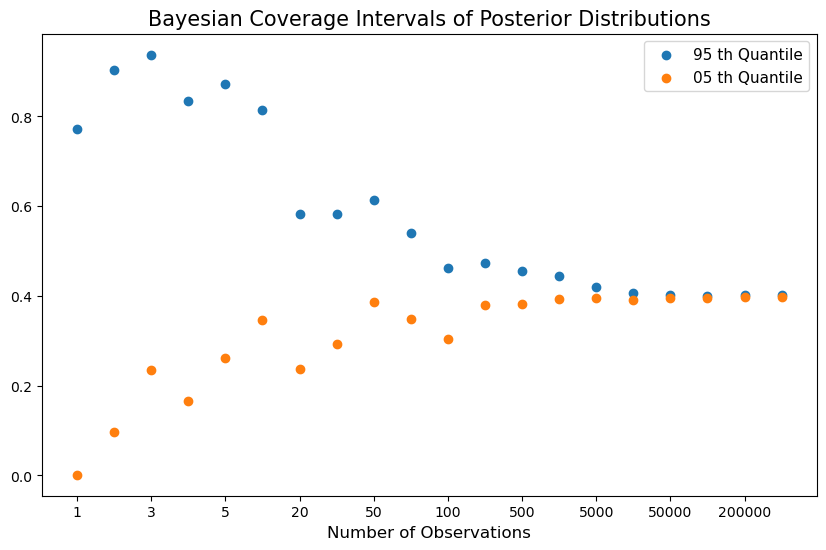

In [17]:
upper_bound = [ii.ppf(0.95) for ii in Bay_stat.posterior_list]
lower_bound = [ii.ppf(0.05) for ii in Bay_stat.posterior_list]

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(np.arange(len(upper_bound)), upper_bound, label='95 th Quantile')
ax.scatter(np.arange(len(lower_bound)), lower_bound, label='05 th Quantile')

ax.set_xticks(np.arange(0, len(upper_bound), 2))
ax.set_xticklabels(num_list[::2])
ax.set_xlabel('Number of Observations', fontsize=12)
ax.set_title('Bayesian Coverage Intervals of Posterior Distributions', fontsize=15)

ax.legend(fontsize=11)
plt.show()